# Convergence rates for different NLP methods

**Randall Romero Aguilar, PhD**

This demo is based on the original Matlab demo accompanying the  <a href="https://mitpress.mit.edu/books/applied-computational-economics-and-finance">Computational Economics and Finance</a> 2001 textbook by Mario Miranda and Paul Fackler.

Original (Matlab) CompEcon file: **demslv12.m**

Running this file requires the Python version of CompEcon. This can be installed with pip by running

    !pip install compecon --upgrade

<i>Last updated: 2022-Sept-05</i>
<hr>


## About

This demo shows how quickly different NLP methods converge to a solution.  In particular, we look for the root of 
$$f(x) = \exp(x) - 1$$

starting with a guess $x_0 = 2$. The true solution is $x = 0$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from compecon import NLP

### Define a NLP problem

Here, we set convergence tolerance `tol=1e-20` and the option `all_x=True` to record all values taken by $x$ from the initial guess `x0=2.0` to the final solution. These values will be stored in the `.x_sequence` attribute.

We also define `err` to compute the base-10 logarithm of the error (the gap between the current iteration and the solution).

In [2]:
A = NLP(lambda x: (np.exp(x)-1, np.exp(x)), all_x=True, tol=1e-20)
err = lambda z: np.log10(np.abs(z)).flatten()
x0 = 2.0

### Solve the problem

#### * Using Newton's method

In [3]:
A.newton(x0)
err_newton = err(A.x_sequence.values)

#### * Using Broyden's method

In [4]:
A.broyden(x0)
err_broyden = err(A.x_sequence.values)

#### * Using function iteration

This method finds a zero of $f(x)$ by looking for a fixpoint of $g(x) = x-f(x)$.

In [5]:
A.funcit(x0)
err_funcit = err(A.x_sequence.values)

###  Plot results

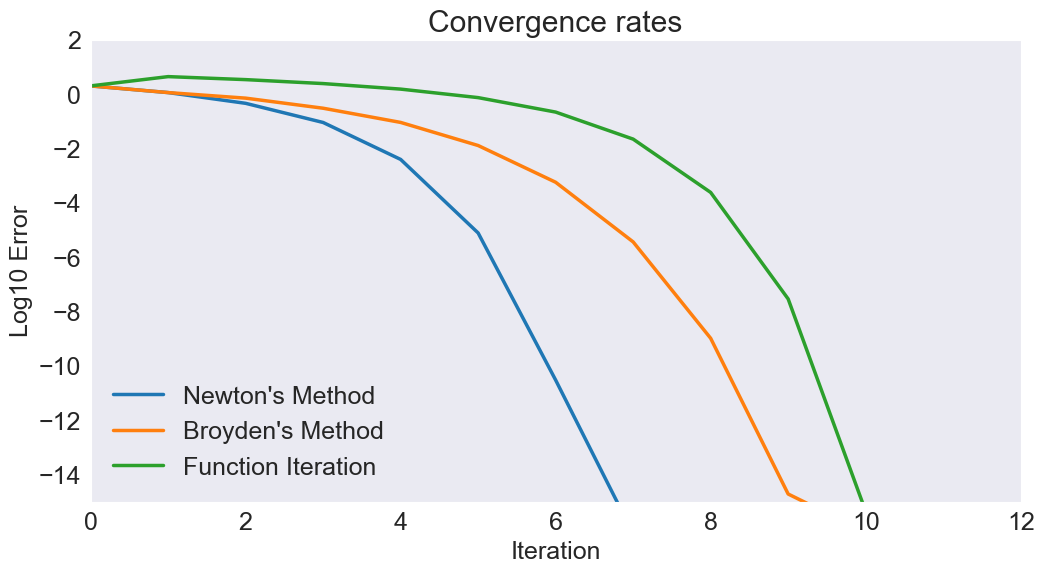

In [6]:
fig, ax = plt.subplots()
ax.set(title='Convergence rates',
       xlabel='Iteration',
       ylabel='Log10 Error',
       xlim=[0, 12],
       ylim=[-15, 2])
ax.plot(err_newton, label="Newton's Method")
ax.plot(err_broyden, label="Broyden's Method")
ax.plot(err_funcit, label="Function Iteration")
ax.legend(loc='lower left');